<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 119.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 105.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 65.8 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
## Write your code here


import pandas as pd

# Load the dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(url)

# Display basic info about the dataset
print("Initial DataFrame Info:")
print(df.info())
print("\nMissing values count:\n", df.isnull().sum())

# Focus on critical columns
critical_columns = ['Employment', 'JobSat', 'RemoteWork']

# Check missing values in critical columns
print("\nMissing values in critical columns:")
print(df[critical_columns].isnull().sum())

# Strategy to handle missing values
# For 'Employment', assume it's critical and drop rows with missing values
df = df.dropna(subset=['Employment'])

# For 'JobSat', fill missing values with the mode (most frequent value)
if df['JobSat'].isnull().sum() > 0:
    mode_value = df['JobSat'].mode()[0]
    df['JobSat'] = df['JobSat'].fillna(mode_value)

# For 'RemoteWork', fill missing values with 'Unknown' to preserve all data
if df['RemoteWork'].isnull().sum() > 0:
    df['RemoteWork'] = df['RemoteWork'].fillna('Unknown')

# Check after managing missing values
print("\nDataFrame Info After Handling Missing Values:")
print(df.info())

print("\nMissing values count after handling:")
print(df.isnull().sum())


Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None

Missing values count:
 ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

Missing values in critical columns:
Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64

DataFrame Info After Handling Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None

Missing values count after handling:
ResponseId                 0
Mai

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.



Median Job Satisfaction by Experience Range:
ExperienceRange
0-5      8.0
5-10     8.0
10-20    8.0
>20      8.0
Name: JobSat, dtype: float64


/tmp/ipykernel_131/3266272533.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_jobsat = df.groupby('ExperienceRange')['JobSat'].median()


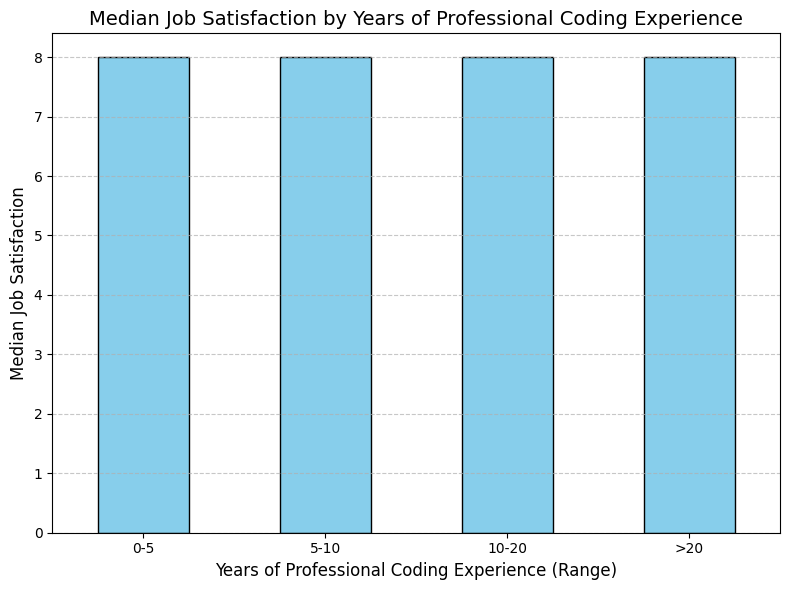

In [4]:
## Write your code here
## Write your code here
if 'YearsCodePro' not in df.columns or 'JobSat' not in df.columns:
    raise ValueError("Columns 'YearsCodePro' and 'JobSat' are missing from the dataset.")

# Convert 'YearsCodePro' to numeric, handling non-numeric entries
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop rows where 'YearsCodePro' or 'JobSat' is missing
df = df.dropna(subset=['YearsCodePro', 'JobSat'])

# Define experience ranges
bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5', '5-10', '10-20', '>20']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Calculate median JobSat for each range
median_jobsat = df.groupby('ExperienceRange')['JobSat'].median()

print("\nMedian Job Satisfaction by Experience Range:")
print(median_jobsat)

# Visualization
plt.figure(figsize=(8, 6))
median_jobsat.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Median Job Satisfaction by Years of Professional Coding Experience', fontsize=14)
plt.xlabel('Years of Professional Coding Experience (Range)', fontsize=12)
plt.ylabel('Median Job Satisfaction', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/tmp/ipykernel_131/3450024787.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='JobSat', order=df['JobSat'].value_counts().index, palette='viridis')


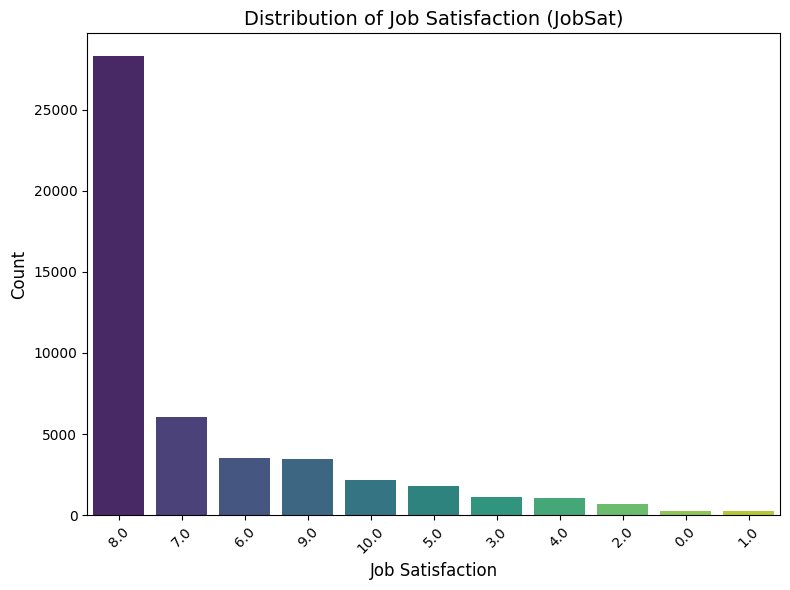

In [5]:
## Write your code here

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='JobSat', order=df['JobSat'].value_counts().index, palette='viridis')

# Add labels and title
plt.title('Distribution of Job Satisfaction (JobSat)', fontsize=14)
plt.xlabel('Job Satisfaction', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_131/3476725170.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index, palette='coolwarm')


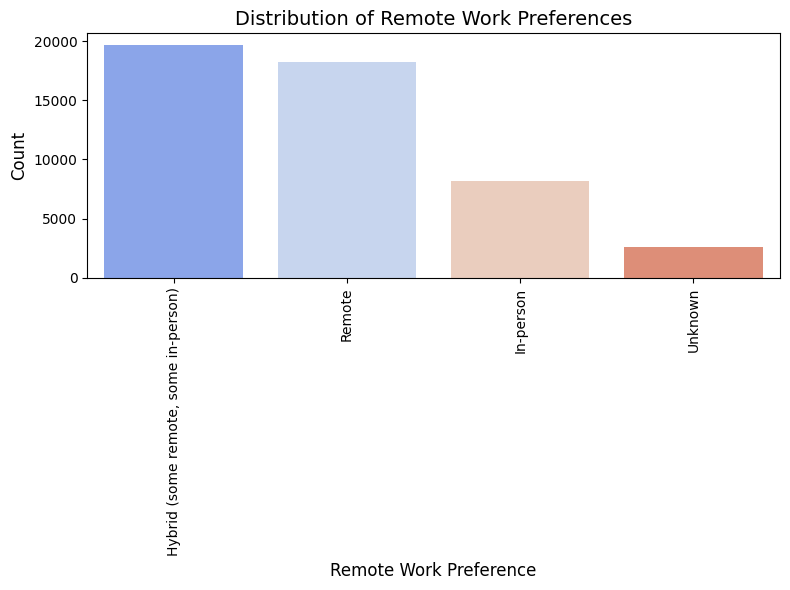


Remote Work Preferences by Employment Type:
RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                15172   
Employed, full-time;Employed, part-time                                               72   
Employed, full-time;Independent contractor, fre...                                  1175   
Employed, full-time;Independent contractor, fre...                                    67   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Student, part-time;Employed,...                                     2   
Student, full-time;Student, part-time;Retired                                          0   
Student, part-time                 

/tmp/ipykernel_131/3476725170.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


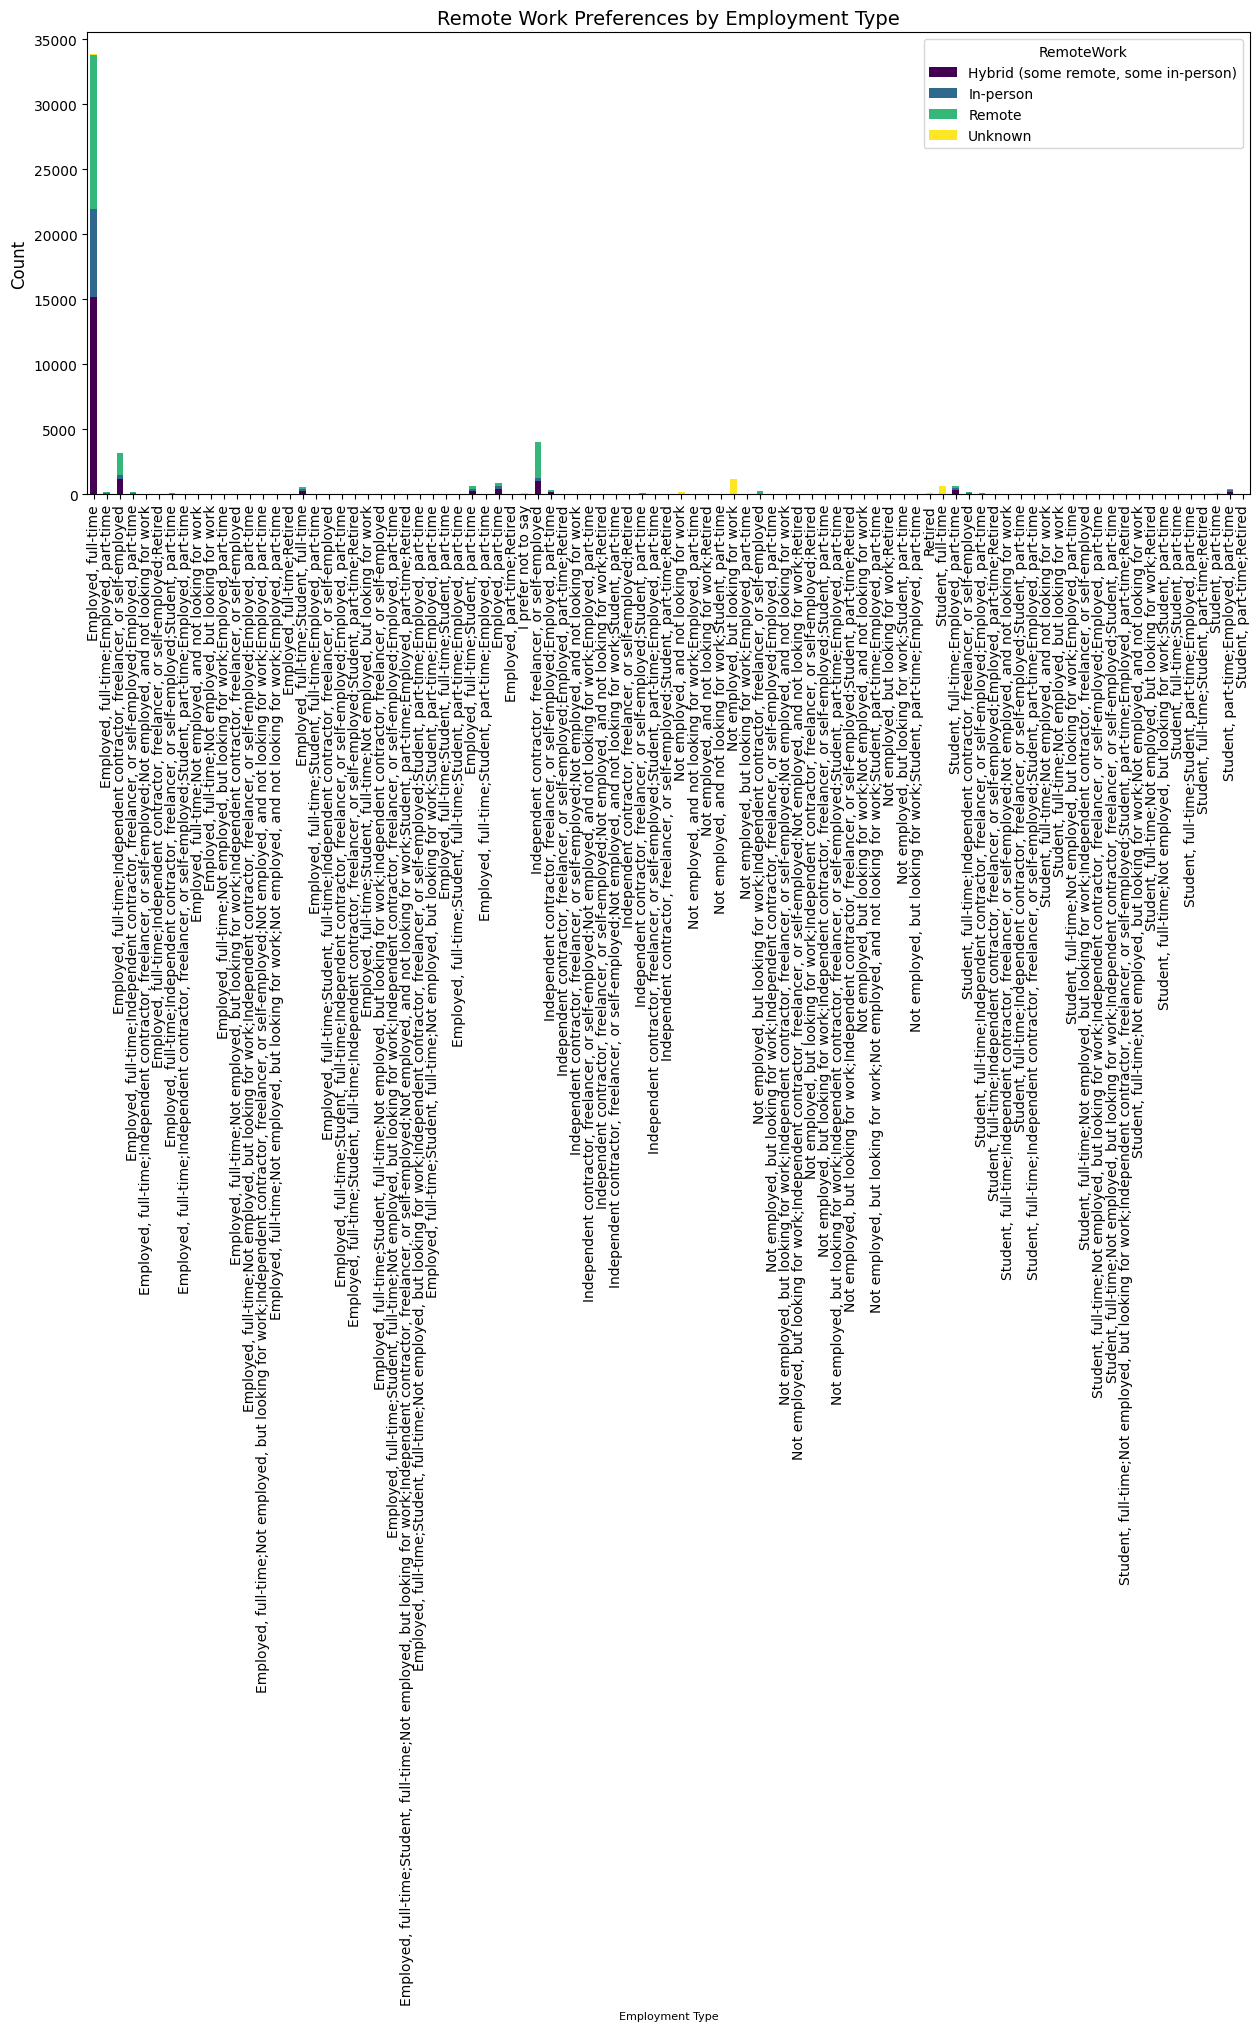

In [6]:
## Write your code here

required_columns = ['RemoteWork', 'Employment']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise ValueError(f"Missing columns: {', '.join(missing_columns)}")

# Drop rows with missing values in relevant columns
df = df.dropna(subset=required_columns)

# Count plot to show remote work distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index, palette='coolwarm')

# Add labels and title
plt.title('Distribution of Remote Work Preferences', fontsize=14)
plt.xlabel('Remote Work Preference', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Cross-tabulation of remote work preferences by employment type
crosstab = pd.crosstab(index=df['Employment'], columns=df['RemoteWork'])
print("\nRemote Work Preferences by Employment Type:")
print(crosstab)

# Visualize cross-tabulation for Employment vs. RemoteWork
crosstab.plot(kind='bar', stacked=True, figsize=(15, 6), colormap='viridis')
plt.title('Remote Work Preferences by Employment Type', fontsize=14)
plt.xlabel('Employment Type', fontsize=8)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


/tmp/ipykernel_131/4109302354.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.values, y=language_counts.index, palette='coolwarm')


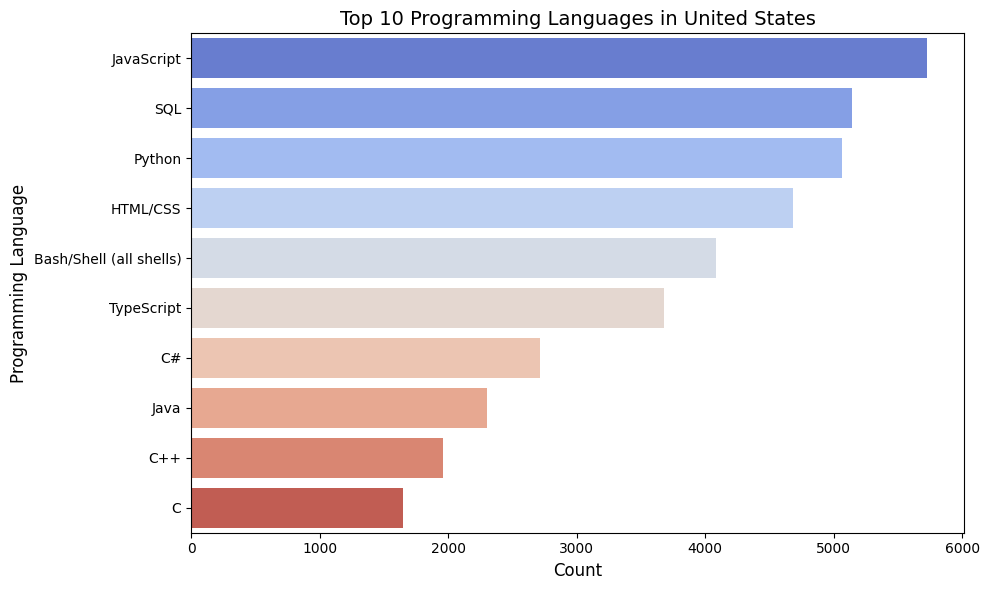

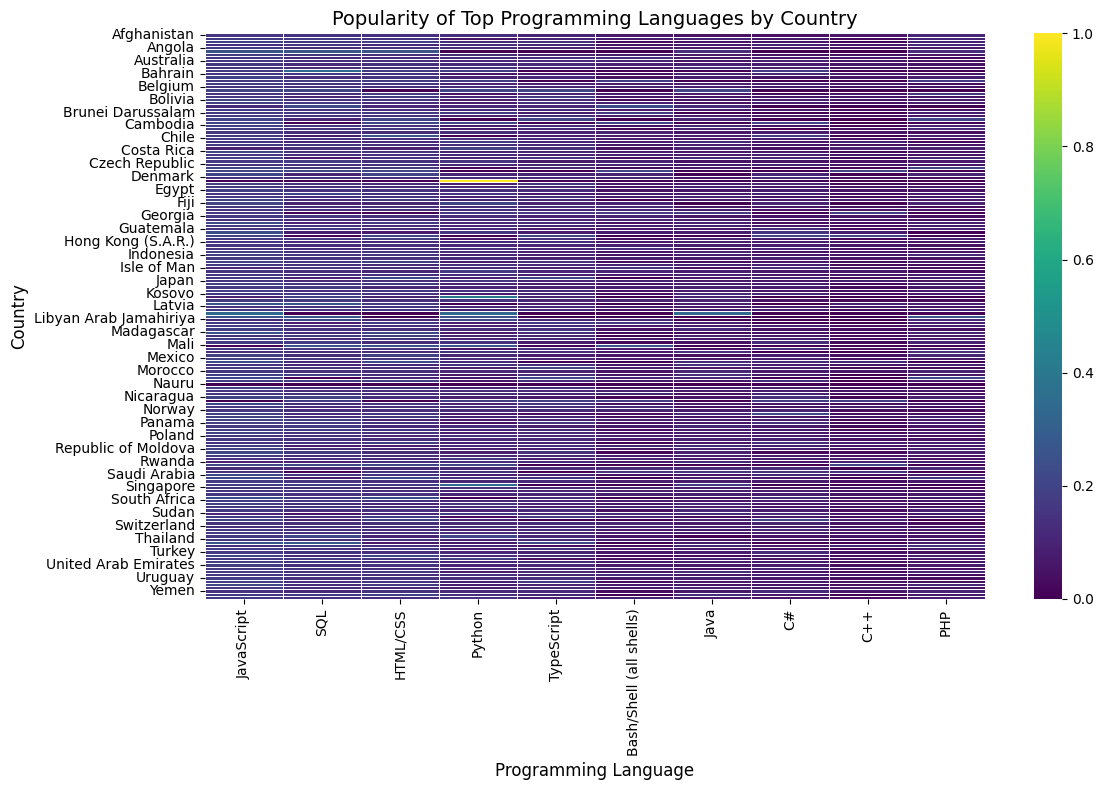

In [7]:
## Write your code here

required_columns = ['LanguageHaveWorkedWith', 'Country']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise ValueError(f"Missing columns: {', '.join(missing_columns)}")

# Normalize country names for the USA
usa_variations = ["United States", "United States of America", "USA", "US", "U.S.", "America"]
df['Country'] = df['Country'].replace(usa_variations, "United States")

# Drop rows with missing values in relevant columns
df = df.dropna(subset=required_columns)

# Ensure 'LanguageHaveWorkedWith' contains strings
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].astype(str)

# Explode the LanguageHaveWorkedWith column (split multiple languages into rows)
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df.explode('LanguageHaveWorkedWith')

# Filter by the normalized region (e.g., "United States")
region = "United States"
df_region = df_exploded[df_exploded['Country'] == region]

# Check if there is any data for the normalized region
if df_region.empty:
    print(f"No data available for the selected region: {region}")
else:
    # Count the occurrences of each programming language in the selected region
    language_counts = df_region['LanguageHaveWorkedWith'].value_counts().head(10)  # Top 10 languages

    # Check if language_counts is non-empty
    if language_counts.empty:
        print(f"No programming language data available for the region: {region}")
    else:
        # Bar plot for top programming languages in the selected region
        plt.figure(figsize=(10, 6))
        sns.barplot(x=language_counts.values, y=language_counts.index, palette='coolwarm')
        plt.title(f'Top 10 Programming Languages in {region}', fontsize=14)
        plt.xlabel('Count', fontsize=12)
        plt.ylabel('Programming Language', fontsize=12)
        plt.tight_layout()
        plt.show()

# Optional: Global analysis (if not filtering by region)
global_language_counts = df_exploded['LanguageHaveWorkedWith'].value_counts().head(10)

# Heatmap for global language popularity by region
language_by_country = pd.crosstab(df_exploded['Country'], df_exploded['LanguageHaveWorkedWith'])
top_languages = global_language_counts.index
language_by_country_top = language_by_country[top_languages]

# Normalize counts by row (to show popularity proportions)
language_by_country_normalized = language_by_country_top.div(language_by_country_top.sum(axis=1), axis=0).fillna(0)

# Check if the normalized table has data
if not language_by_country_normalized.empty:
    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(language_by_country_normalized, cmap='viridis', cbar=True, linewidths=0.5)
    plt.title('Popularity of Top Programming Languages by Country', fontsize=14)
    plt.xlabel('Programming Language', fontsize=12)
    plt.ylabel('Country', fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("No data available for global language popularity analysis.")

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


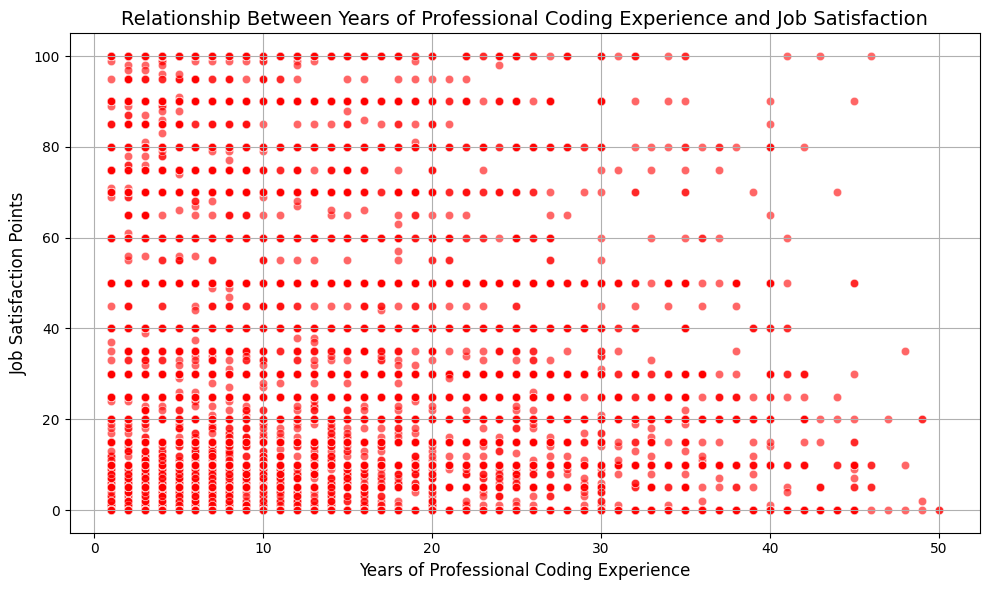

In [18]:
## Write your code here

required_columns = ['YearsCodePro', 'JobSatPoints_1']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise ValueError(f"Missing columns: {', '.join(missing_columns)}")

# Drop rows with missing or non-numeric values in relevant columns
df = df.dropna(subset=required_columns)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')  # Convert YearsCodePro to numeric
df['JobSatPoints_1'] = pd.to_numeric(df['JobSatPoints_1'], errors='coerce')  # Convert JobSatPoints_1 to numeric

# Remove rows with invalid (NaN) values after conversion
df = df.dropna(subset=required_columns)

# Scatter plot for YearsCodePro vs. JobSatPoints_1
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsCodePro', y='JobSatPoints_1', data=df, alpha=0.6, color='red')

# Customize the plot
plt.title('Relationship Between Years of Professional Coding Experience and Job Satisfaction', fontsize=14)
plt.xlabel('Years of Professional Coding Experience', fontsize=12)
plt.ylabel('Job Satisfaction Points', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


Cross-tabulation of EdLevel and Employment:
Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                            0.756563   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                   0.801836   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                0.796264   
Primary/elementary school                                      0.688525   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                 0.821375   
Secondary school (e.g. American high school, Ge...             0.609084   
Some college/university study without earning a...             0.691989   
Something else                                                 0.732075   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Associate degre

/tmp/ipykernel_131/4158910133.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


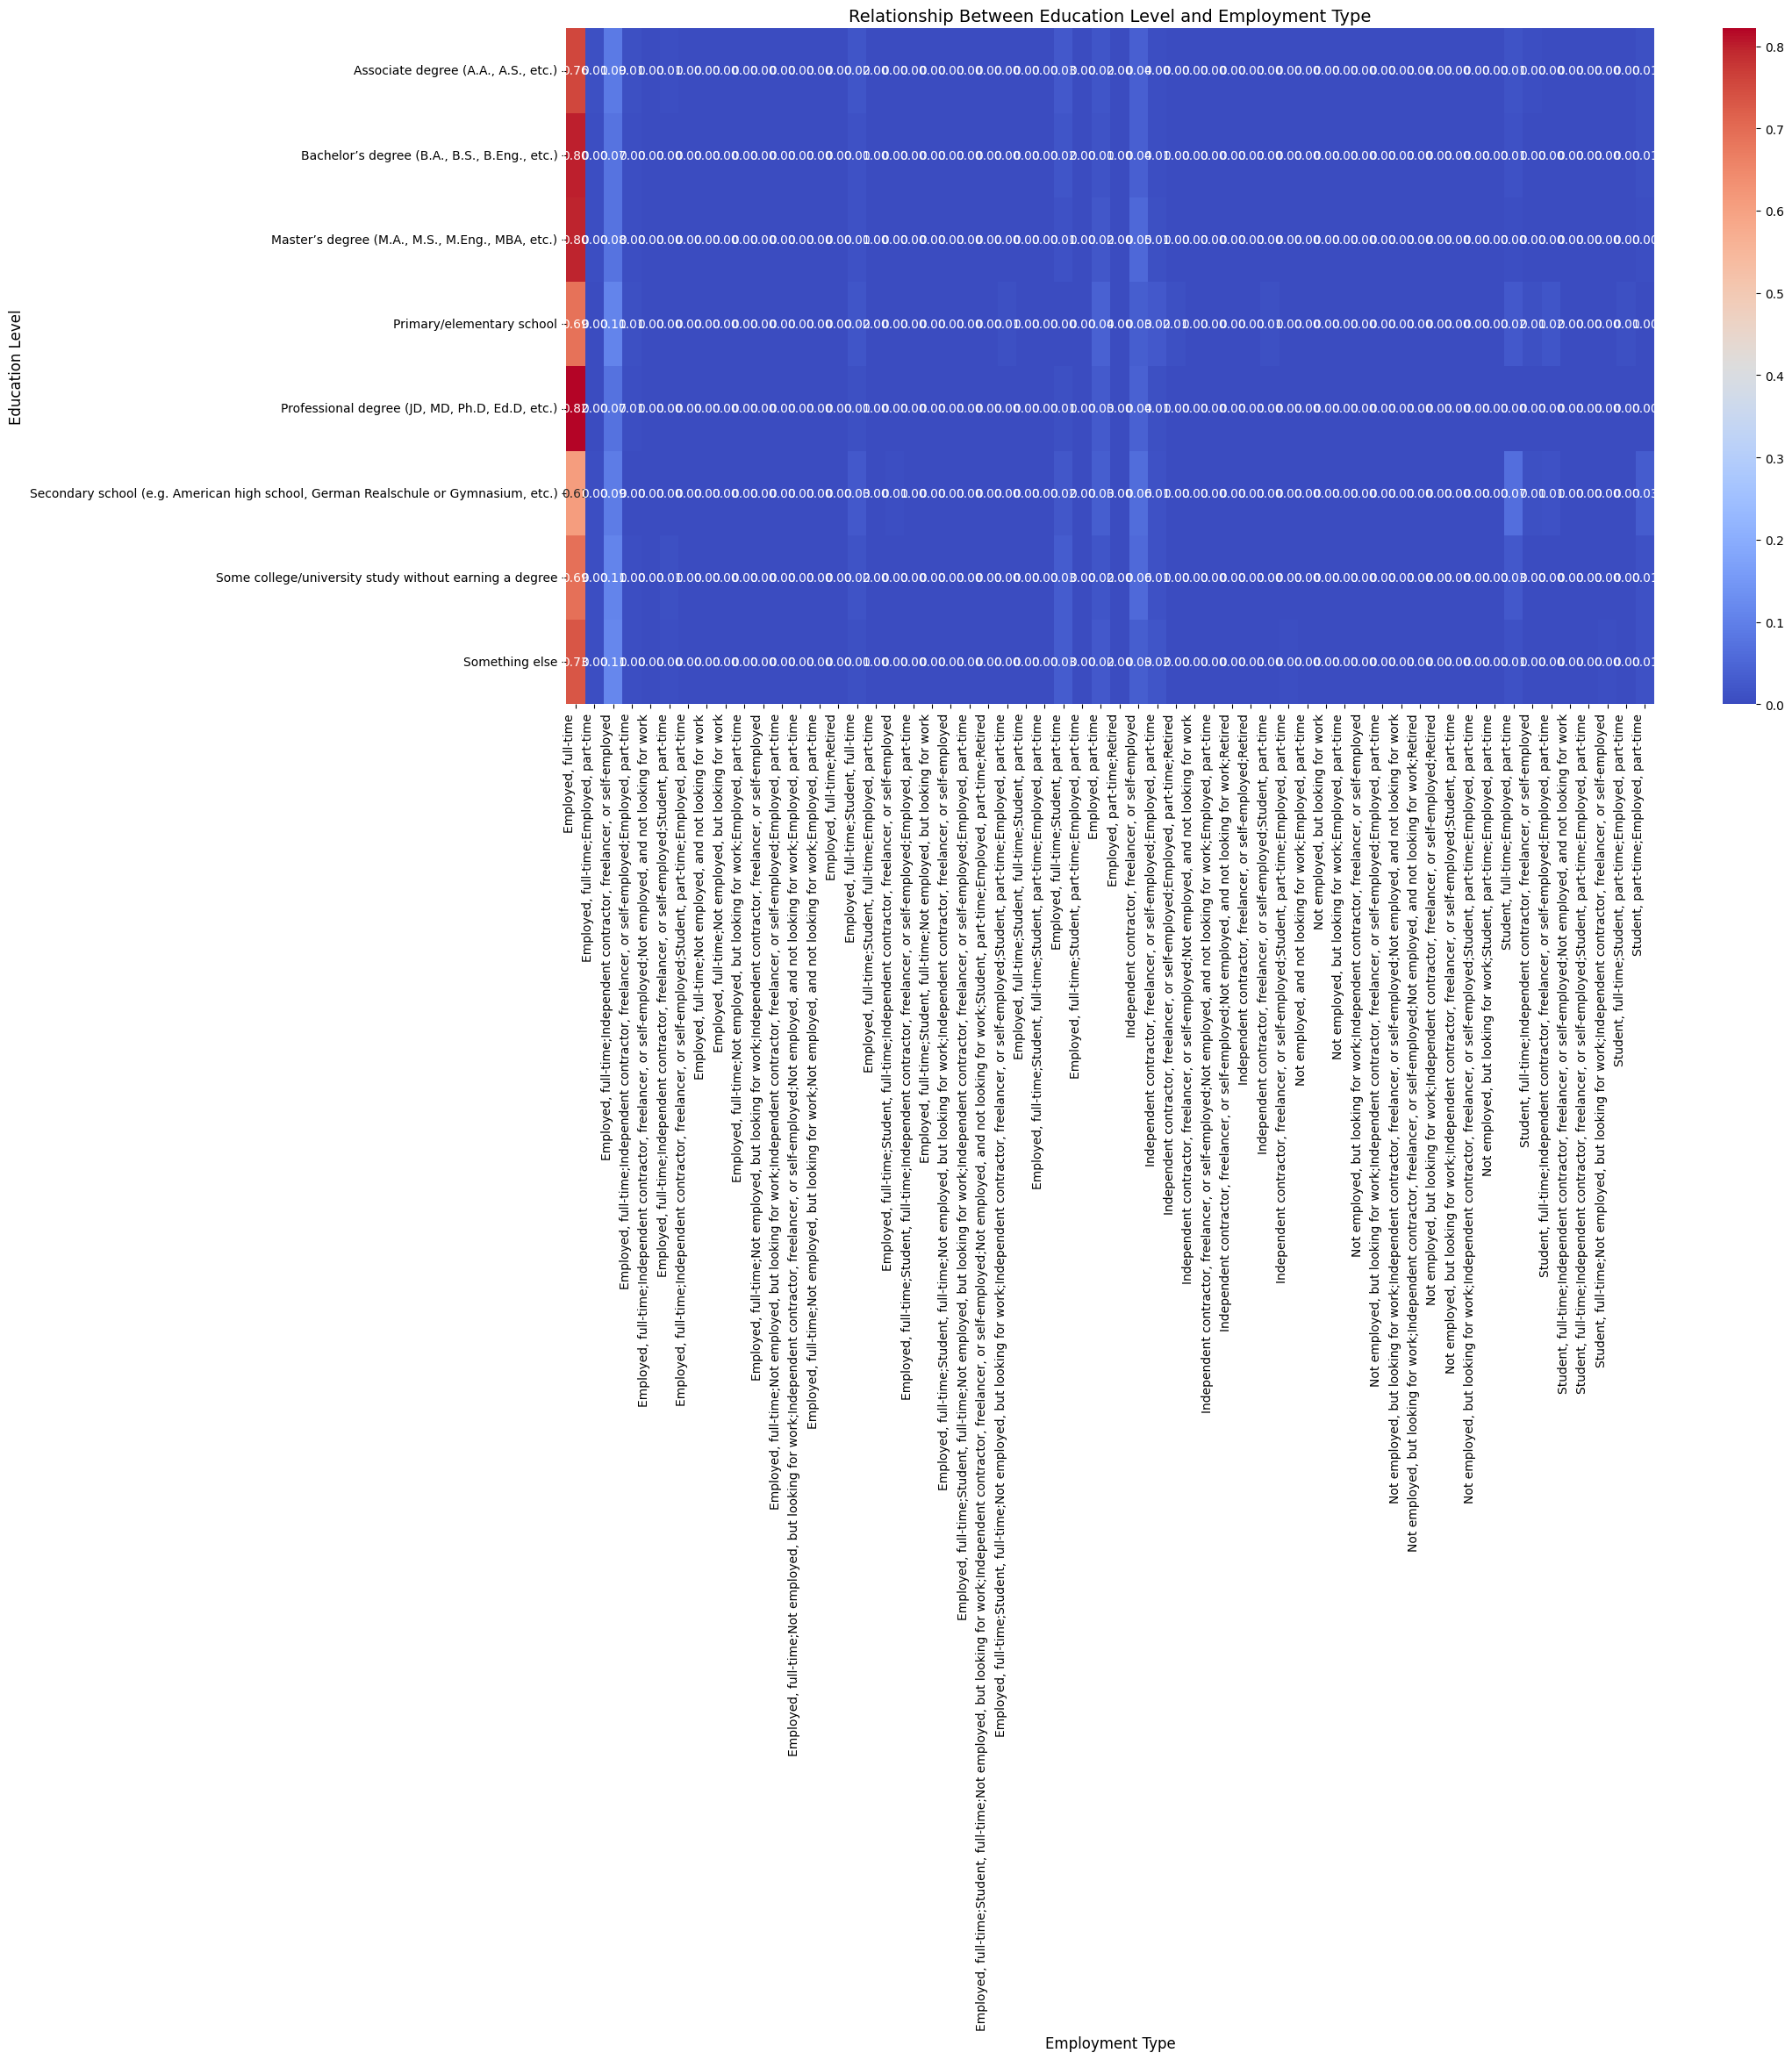

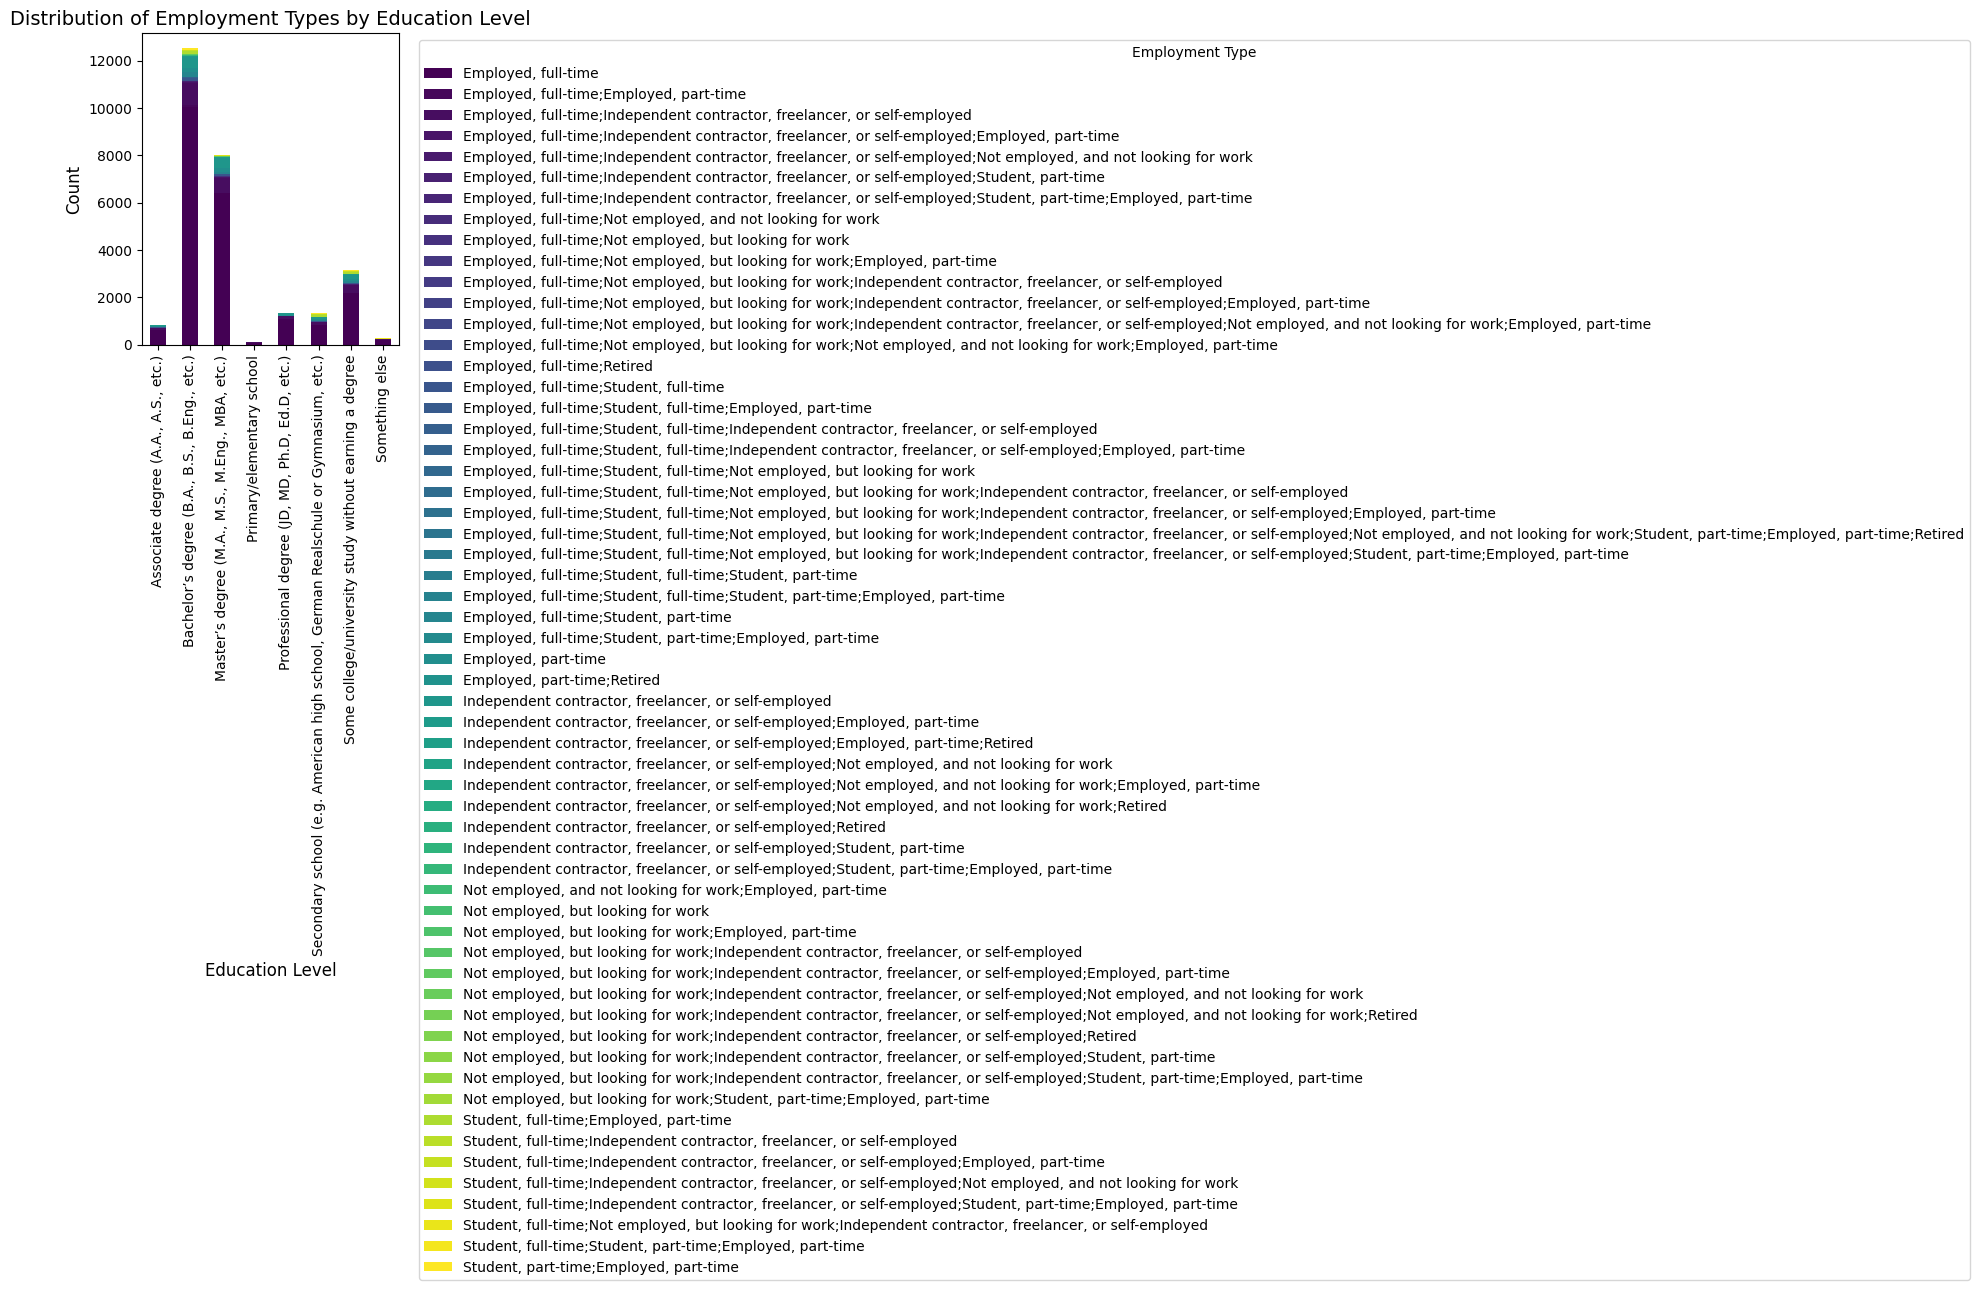

In [20]:
## Write your code here

required_columns = ['EdLevel', 'Employment']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise ValueError(f"Missing columns: {', '.join(missing_columns)}")

# Drop rows with missing values in relevant columns
df = df.dropna(subset=required_columns)

# Cross-tabulation between EdLevel and Employment
education_employment_ct = pd.crosstab(df['EdLevel'], df['Employment'], normalize='index')

# Print the cross-tabulation
print("Cross-tabulation of EdLevel and Employment:")
print(education_employment_ct)

# Create a heatmap to visualize the relationship
plt.figure(figsize=(20, 10))
sns.heatmap(education_employment_ct, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

# Customize the plot
plt.title('Relationship Between Education Level and Employment Type', fontsize=14)
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Education Level', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

# Bar plot for better visualization
education_employment_counts = pd.crosstab(df['EdLevel'], df['Employment'])
education_employment_counts.plot(kind='bar', stacked=True, figsize=(20, 10), colormap='viridis')

# Customize the bar plot
plt.title('Distribution of Employment Types by Education Level', fontsize=14)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
## Write your code here

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
